In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
% matplotlib inline
x1d_dir='/DataDisk/datafiles/PGCC_HST/x1d_files/'

In [2]:
class LineInfo(object):
    def __init__(self,dat_line,err_line):
        dat=dat_line.split()
        self.ion=dat[0]
        self.n=float(dat[1])
        self.b=float(dat[2])
        self.wav=float(dat[3])
        self.v=float(dat[4])
        self.n_flag=int(dat[5])
        self.b_flag=int(dat[6])
        self.v_flag=int(dat[7])
        self.eqw=float(dat[8])
        self.tot_eqw=float(dat[9])
        
        errs=err_line.split()
        self.n_err=float(errs[0])
        self.b_err=float(errs[1])
        self.v_err=float(errs[2])
        
    def __repr__(self):
        return self.ion
    def __str__(self):
        return self.ion

In [3]:
f=open('jenkins.txt')
jenk=[]
for line in f:
    if not line.startswith('#'):
        jenk.append([x.strip() for x in line.strip('\n').split('|')])

In [13]:
folders=[x for x in os.listdir(x1d_dir) if (os.path.isdir(x1d_dir+x) and x.startswith('.')==False)]
#folders=['HD69106','HD72754','HD100546','HD106343','HD108002','HD110434','HD111934','HD114886','HD116781','HD122879','HD152249','HD208440','HD208947',]
folders.remove('HD100546')
folders.remove('HD72350')
e140h_sightlines=[]
for folder in [x for x in folders if os.path.isdir(x1d_dir+x+'/E140H')]:
    e140h_results=[x for x in os.listdir(x1d_dir+folder+'/E140H/') if x.startswith('cI') and x.endswith('_results.txt')]
    if len(e140h_results)>0:
        e140h_sightlines.append(folder)

e140h_sightlines.sort(key=len)
#sightlines=[x for x in os.listdir(x1d_dir) if os.path.isdir(x1d_dir+x+'/E140H')==True and x.startswith('.')==False]

In [14]:
e140h_sightline_comps=[]
for sightline in e140h_sightlines:
    results_files=[x for x in os.listdir(x1d_dir+sightline+'/E140H/') if x.startswith('cI') and x.endswith('_results.txt')]
    results=open(x1d_dir+sightline+'/E140H/'+results_files[0])
    lines=[x.strip() for x in results.read().split('\n')]
    comps=[]
    for i in range(len(lines)):
        if lines[i].startswith('*'):
            idx=i+1
            c0=LineInfo(lines[idx],lines[idx+1])
            c1=LineInfo(lines[idx+2],lines[idx+3])
            c2=LineInfo(lines[idx+4],lines[idx+5])
            comp=[c0,c1,c2]
            comps.append(comp)
    e140h_sightline_comps.append([sightline,comps])
print [(k[0], len(k[1]))for k in e140h_sightline_comps]

[('HD1383', 6), ('HD37021', 0), ('HD40893', 5), ('HD62542', 1), ('HD93222', 3), ('HD72754', 3), ('HD24534', 1), ('HD69106', 2), ('HD44173', 0), ('HD23180', 1), ('HD93205', 2), ('HD42111', 0), ('HD101131', 4), ('HD203532', 1), ('HD192577', 1), ('HD232522', 4), ('HD208440', 0), ('HD115071', 4), ('HD147683', 2), ('HD111934', 4), ('HD106343', 5), ('HD116781', 3), ('HD101436', 3), ('HD137595', 3), ('HD203374', 5), ('HD114886', 7), ('HD124979', 3), ('HD152249', 5), ('HD110434', 2), ('CPD-592603', 2)]


In [15]:
co=[]
for sightline in e140h_sightlines:
    co_files=[x for x in os.listdir(x1d_dir+sightline+'/E140H') if x.startswith('co') and x.endswith('_results.txt')]
    if len(co_files)>0:
        co_results=open(x1d_dir+sightline+'/E140H/'+co_files[0],'r')
        lines=[x.strip() for x in co_results.read().split('\n')]
        co.append([sightline,float([x for x in lines[2].split(' ') if len(x)>1][4])])

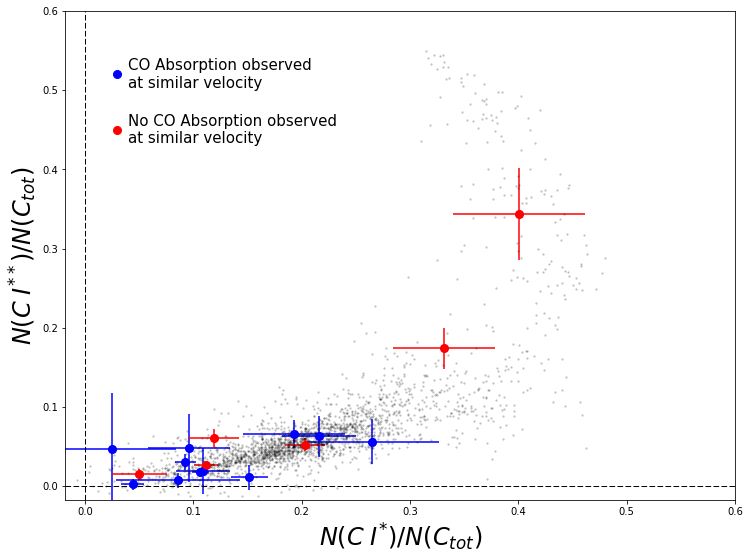

In [16]:
co_bright=['HD62542','HD147683']
radio_co_dark=['HD232522','HD72350','HD124979','CPD-592603','HDE303308','HD152249','HD208440']
uv_co_dark=['HD116781','HD72754','HD37903','HD111934','HD93205']

fig=plt.figure(1,figsize=(12,9))
subplt=plt.subplot(111)
xmax=0.6
ymax=0.6
plt.xlim(-0.03*xmax,xmax)
plt.ylim(-0.03*ymax,ymax)
marker = itertools.cycle(('o'))#(('^', 'D', 's', 'o', '*'))
colors=itertools.cycle(('b'))#(('k','r','g','b','y','c','m'))
plt.axhline(0,0,1, color='k',linestyle='--', linewidth=1)
plt.axvline(0,0,1, color='k',linestyle='--',linewidth=1)

for entry in jenk:
    subplt.plot(entry[2],entry[4],'ko',alpha=0.25,markersize=2,mew=0.1)

comps_to_plot=[x for x in e140h_sightline_comps if (len(x[1])>0 and x[0] in co_bright+radio_co_dark+uv_co_dark)]
for comp in comps_to_plot:
    #c=colors.next()
    #m=marker.next()
    co_dat=[x for x in co if x[0]==comp[0]]

    m='o'
    if len(co_dat)>0:
        comp[1].sort(key=lambda x: abs(x[0].v-co_dat[0][1]))
    for entry in comp[1]:
        col='b'
        if len(co_dat)>0:
            if comp[1].index(entry)==0:
                col='r'
        tot=sum([x.n for x in entry])
        dtot=np.sqrt(sum([x.n_err*x.n_err for x in entry]))
        
        f1=entry[1].n/tot
        df1=f1*np.sqrt((entry[1].n_err/entry[1].n)**2+(dtot/tot)**2)
        f2=entry[2].n/tot
        df2=f2*np.sqrt((entry[2].n_err/entry[2].n)**2+(dtot/tot)**2)
        if f1 > 0.0001 and f2 > 0.0001:
            subplt.plot(f1,f2, marker=m,ms=8,mew=1,c=col,mec=col)
            subplt.errorbar(f1,f2,xerr=df1,yerr=df2, marker=m,ms=5,mew=3,c=col,mec=col)
            #subplt.text(f1,f2+0.01, comp[0])
   
    #Legend stuff
    #plt.text(0.83*xmax,0.90*ymax-comps_to_plot.index(comp)*0.04*ymax,
    #         '{:<12}'.format(comp[0]), color=c,family='monospace', fontsize=14, fontweight='normal')
    #plt.plot(0.81*xmax,0.91*ymax-comps_to_plot.index(comp)*0.04*ymax,
    #         marker=m,ms=10,mew=1,c=c,mec=c, transform=plt.gca().transData)
    subplt.set_xlabel('$N(C\;I^{*})/N(C_{tot})$', fontsize=24)
    subplt.set_ylabel('$N(C\;I^{**})/N(C_{tot})$', fontsize=24)

    
subplt.plot(0.03,0.52, 'bo', ms=8,mew=1)
subplt.plot(0.03,0.45, 'ro', ms=8,mew=1)
subplt.text(0.04,0.52, 'CO Absorption observed\nat similar velocity',va='center',fontsize=15)
subplt.text(0.04,0.45, 'No CO Absorption observed\nat similar velocity',va='center',fontsize=15)
#plt.text(0.83*xmax,0.95*ymax,"{:<12}".format('Sightline'),family='monospace', fontsize=14, fontweight='bold')
plt.savefig('/DataDisk/Dropbox/HSTProposal/Cycle25/PGCC/cycle25_jenkins.pdf')